In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('../data/ab_test_data.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [5]:
print(df.shape)

(1000, 4)


In [6]:
print(df.head())

   user_id group  converted           timestamp
0        1     A          0 2025-05-16 11:30:01
1        2     B          0 2025-05-01 08:11:23
2        3     A          0 2025-05-12 09:34:18
3        4     A          0 2025-05-18 12:48:23
4        5     A          0 2025-05-19 18:21:25


In [9]:
print(f'check the null') 
print(df.isnull().sum())

check the null
user_id      0
group        0
converted    0
timestamp    0
dtype: int64


In [11]:
group_counts = df['group'].value_counts()
print("A and B group counts", group_counts)

A and B group counts group
B    510
A    490
Name: count, dtype: int64


In [14]:
conversion_rates = df.groupby('group')['converted'].agg(['count', 'sum', 'mean'])
conversion_rates.columns = ['count', 'sum', 'mean']
print("A and B conversion rates")
print(conversion_rates)

A and B conversion rates
       count  sum      mean
group                      
A        490   46  0.093878
B        510   73  0.143137


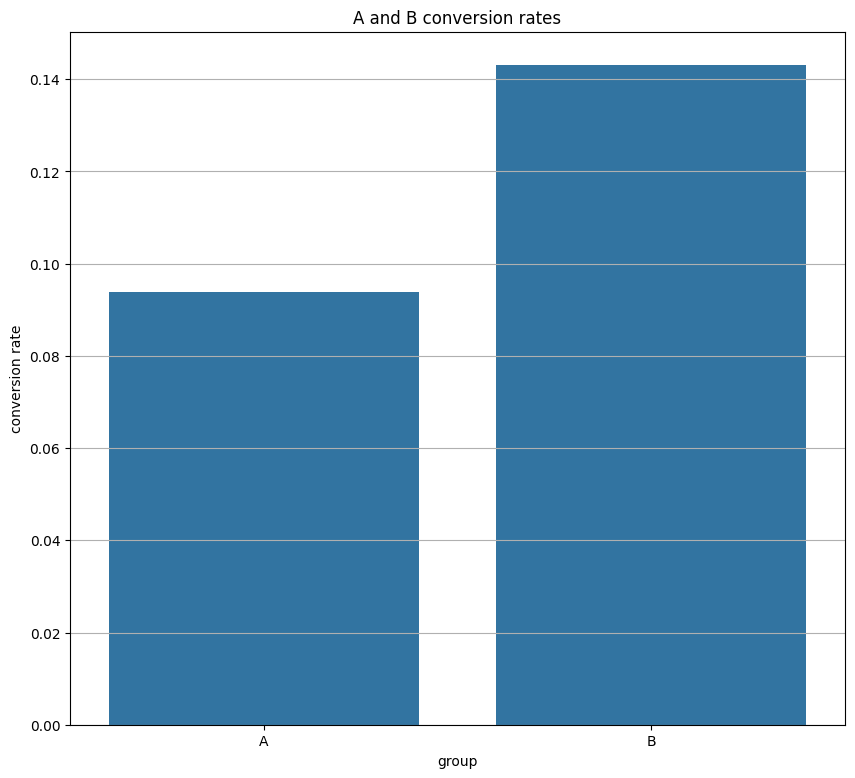

In [16]:
plt.figure(figsize=(10,9))
sns.barplot(data = conversion_rates.reset_index(), x = 'group', y = 'mean')
plt.title('A and B conversion rates')
plt.xlabel('group')
plt.ylabel('conversion rate')
plt.grid(axis='y')
plt.show()